❗ 파일 주소는 각자 수정해주세요...

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('./data/okcupid_profiles.csv')

In [154]:
df['job'].value_counts()

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

In [155]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [156]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [157]:
(len(df.columns)-df.isna().sum(axis=1))/len(df.columns)

0        1.000000
1        0.870968
2        0.806452
3        0.838710
4        0.741935
           ...   
59941    0.903226
59942    1.000000
59943    0.967742
59944    1.000000
59945    0.903226
Length: 59946, dtype: float64

In [158]:
df['Response rate'] = (len(df.columns)-df.isna().sum(axis=1))/len(df.columns)

In [159]:
df["Response rate"].describe()

count    59946.000000
mean         0.852985
std          0.123264
min          0.290323
25%          0.806452
50%          0.903226
75%          0.935484
max          1.000000
Name: Response rate, dtype: float64

In [160]:
essay_cols = ['essay' + str(i) for i in range(10)]

# 에세이 전체 글자 수 합산 (결측치는 0으로 처리)
df['total_essay_len'] = df[essay_cols].fillna('').apply(lambda x: x.str.len()).sum(axis=1)

# 작성한 에세이 질문 개수 (몇 개나 답했는가)
df['essay_answered_count'] = df[essay_cols].notnull().sum(axis=1)

In [161]:
# 필요 컬럼
required_cols = [
    "sex","orientation","body_type","drinks","drugs","education","height","job",
    "last_online","religion","sign","smokes", "Response rate"
]

# keep 컬럼
keep_cols = ["age","status","diet","ethnicity","location","pets", "total_essay_len", "essay_answered_count"]

# 사용 컬럼
use_cols = required_cols + keep_cols
df = df[use_cols].copy()

In [162]:
df.columns

Index(['sex', 'orientation', 'body_type', 'drinks', 'drugs', 'education',
       'height', 'job', 'last_online', 'religion', 'sign', 'smokes',
       'Response rate', 'age', 'status', 'diet', 'ethnicity', 'location',
       'pets', 'total_essay_len', 'essay_answered_count'],
      dtype='object')

In [163]:
# 마지막 온라인 시간 - 시간 삭제
df["last_online"] = pd.to_datetime(df["last_online"].str[:10], format="%Y-%m-%d")

In [164]:
ref_date = df['last_online'].max()
print(f"데이터셋 기준일 (가장 최근 접속일): {ref_date}")

데이터셋 기준일 (가장 최근 접속일): 2012-07-01 00:00:00


In [165]:
df['is_churned'] = (ref_date - df['last_online']).dt.days >= 14
df['is_churned'] = df['is_churned'].astype(int)

In [166]:
df['is_churned'].value_counts()

is_churned
0    39921
1    20025
Name: count, dtype: int64

In [167]:
# 성별 인코딩 
df['sex'] = df['sex'].map({"f":0, "m":1}).astype("int8")


# 성적 지향 인코딩
df["orientation"] = df["orientation"].astype("string").str.strip().str.lower()

# 성소수자 매핑
minor_map = {
    "straight": 0,   # 이성애자
    "gay": 1,        # 동성애자 (성소수자)
    "bisexual": 1    # 양성애자 (성소수자)
}

df["orientation"] = df["orientation"].map(minor_map).astype("int8")

df = pd.get_dummies(df, columns=['orientation'], drop_first=True)


# height 전처리
df = df.drop(df.index[df['height'].isna()])     # 결측치 3개 제거
df = df.drop(df.index[df['height'] < 30])       # 이상치 7개 제거 : 30inch = 76.2cm

In [168]:
# 석사 이상
high_edu = ['graduated from masters program', 'working on masters program',
           'graduated from ph.d program', 'working on ph.d program',
           'graduated from med school', 'working on law school',
           'working on med school', 'dropped out of masters program',
           'masters program', 'dropped out of ph.d program',
           'ph.d program', 'law school', 'graduated from law school',
           'dropped out of law school', 'dropped out of med school',
           'med school'
]
# 대학교 졸업
univ_grad = ['graduated from college/university', 'graduated from two-year college',
             'college/university'
]
# 대학교 재학
univ_ing = ['working on college/university', 'working on two-year college',
            'dropped out of college/university', 'two-year college',
            'dropped out of two-year college'
]
# 고등학교 졸업 이하
high_school = ['graduated from high school', 'dropped out of high school',
               'high school', 'working on high school'
]
# 나머지
other = ['graduated from space camp', 'dropped out of space camp',
         'working on space camp', 'space camp'
]
# education 컬럼 값 통합
df['education'] = df['education'].replace(high_edu, 'high_edu')
df['education'] = df['education'].replace(univ_grad, 'univ_grad')
df['education'] = df['education'].replace(univ_ing, 'univ_ing')
df['education'] = df['education'].replace(high_school, 'high_school')
df['education'] = df['education'].replace(other, 'other')

In [169]:
df['education'].value_counts()
# 범주형 변수 원-핫 인코딩
# df = pd.get_dummies(df, columns=['education'], drop_first=True)

# 순서가 있으니까 그래도 라벨링?
edu_map = {
    'high_school': 0,
    'univ_ing': 1,
    'univ_grad': 2,
    'high_edu': 3,
    'other': float('nan')  # 혹은 NaN 처럼 평균에 영향을 주지 않는 값으로 설정
}

df['education'] = df['education'].map(edu_map)

In [170]:
job_score_map = {
    # 3점: 전문/기술/금융/의료
    'science / tech / engineering': 3, 'computer / hardware / software': 3,
    'medicine / health': 3, 'executive / management': 3,
    'banking / financial / real estate': 3, 'law / legal services': 3,
    
    # 2점: 교육/예술/영업/정부
    'sales / marketing / biz dev': 2, 'education / academia': 2,
    'artistic / musical / writer': 2, 'entertainment / media': 2,
    'political / government': 2,
    
    # 1점: 학생/서비스/건설/군인
    'student': 1, 'hospitality / travel': 1, 'construction / craftsmanship': 1,
    'clerical / administrative': 1, 'transportation': 1, 'military': 1,
    
    # 0점: 기타/무직/은퇴
    'other': 0, 'unemployed': 0, 'retired': 0, 'rather not say': 0
}

# 1. 수치형 점수 컬럼 생성
df['job_score'] = df['job'].map(job_score_map).fillna(0)

# 2. stability_index 업데이트 (나이 * 학력 점수 * 직업 점수)
# +1은 점수가 0인 경우 데이터가 소실되는 것을 방지하기 위함입니다.
df['stability_index'] = df['age'] * (df['education'] + 1) * (df['job_score'] + 1)

In [171]:
# 별자리 전처리

def classify_belief(text):
    # 결측치 처리 (NaN이면 안 믿는다로 분류)
    if pd.isna(text):
        return 0
    
    # 믿는 그룹의 키워드가 포함되어 있는지 확인
    if "fun to think about" in text or "matters a lot" in text:
        return 1
    
    # 그 외 (doesn't matter 또는 별자리 이름만 있는 경우)
    else:
        return 0

# 새로운 컬럼 생성 (두번 실행 금지)
df['sign'] = df['sign'].apply(classify_belief)

In [172]:
# 별자리 결과 확인
print(df['sign'].value_counts())

sign
0    39931
1    20005
Name: count, dtype: int64


In [173]:
# 별자리 원핫인코딩
df = pd.get_dummies(df, columns=['sign'], drop_first=True)

In [174]:
# used up, rather not say - 결측 처리
df["body_type"] = df["body_type"].replace({"used up": np.nan, "rather not say": np.nan})

body_map = {
    # 마름
    "thin": "slim",
    "skinny": "slim",

    # 보통
    "average": "average",

    # 건강
    "fit": "fit",
    "athletic": "fit",
    "jacked": "fit",

    # 통통
    "curvy": "curvy",
    "a little extra": "curvy",
    "full figured": "curvy",
    "overweight": "curvy",
}

df["body_type"] = df["body_type"].map(body_map)

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['body_type'])

In [175]:
# smokes 인코딩 로직
smokes_map = {
    'no': 0,
    'sometimes': 1,
    'trying to quit': 1,
    'when drinking': 1,
    'yes': 5
}
df['smokes'] = df['smokes'].map(smokes_map).fillna(0) # 결측치는 보통 '안 피움'으로 간주

df['smokes'].value_counts()

smokes
0.0    49401
1.0     8305
5.0     2230
Name: count, dtype: int64

In [176]:
# 1. 결측치 처리 (가장 빈도가 높은 'never'로 채우기)
df['drugs'] = df['drugs'].fillna('never')

# 2. 값 매핑 (never: 2, sometimes: 1, often: 0)
drug_map = {
    'never': 0,
    'sometimes': 1,
    'often': 5
}

df['drugs'] = df['drugs'].map(drug_map)

# 결과 확인
print(df['drugs'].value_counts())

drugs
0    51795
1     7732
5      409
Name: count, dtype: int64


In [177]:
# drinks 인코딩 로직
drinks_map = {
    'socially': 0,
    'rarely': 0,
    'not at all': 1,
    'often': 1,
    'very often': 5,
    'desperately': 5
}
df['drinks'] = df['drinks'].map(drinks_map).fillna(0)

df['drinks'].value_counts()

drinks
0.0    50715
1.0     8430
5.0      791
Name: count, dtype: int64

In [178]:
# 무교
religion_none = ['agnosticism', 'atheism', 
                 'atheism and laughing about it', 'atheism but not too serious about it',
                 'atheism and somewhat serious about it', 'agnosticism but not too serious about it',
                 'agnosticism and laughing about it', 'agnosticism and somewhat serious about it',
                 'atheism and very serious about it', 'agnosticism and very serious about it',
                 ]
# 종교 신자
religion = ['other', 'catholicism but not too serious about it',
            'other and laughing about it', 'christianity',
            'christianity but not too serious about it', 'other but not too serious about it',
            'judaism but not too serious about it', 'catholicism',
            'christianity and somewhat serious about it', 'other and somewhat serious about it',
            'catholicism and laughing about it', 'judaism and laughing about it',
            'buddhism but not too serious about it', 'judaism',
            'christianity and very serious about it', 'catholicism and somewhat serious about it',
            'other and very serious about it', 'buddhism and laughing about it',
            'buddhism', 'christianity and laughing about it',
            'buddhism and somewhat serious about it', 'judaism and somewhat serious about it',
            'hinduism but not too serious about it', 'hinduism', 'catholicism and very serious about it',
            'buddhism and very serious about it', 'hinduism and somewhat serious about it',
            'islam', 'hinduism and laughing about it', 'islam but not too serious about it',
            'islam and somewhat serious about it', 'judaism and very serious about it',
            'islam and laughing about it', 'hinduism and very serious about it', 'islam and very serious about it']
# religion 컬럼 값 통합
df['religion'] = df['religion'].replace(religion_none, 'no_religion')
df['religion'] = df['religion'].replace(religion, 'religion')
# 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['religion'], drop_first=True)
# status 컬럼 인코딩

df['status_encoding'] = np.select(
    [df['status'] == 'single'], 
    [1],
    default=0
)
# status_encoding 컬럼의 value_count() 출력
print(df['status_encoding'].value_counts())

status_encoding
1    55687
0     4249
Name: count, dtype: int64


In [179]:
# status 컬럼 인코딩

df['status_encoding'] = np.select(
    [df['status'] == 'single'], 
    [1],
    default=0
)
# status_encoding 컬럼의 value_count() 출력
print(df['status_encoding'].value_counts())

# status drop
df = df.drop('status', axis=1)

status_encoding
1    55687
0     4249
Name: count, dtype: int64


In [180]:
 # age 이상치 제거 (70세 이상) 
df = df[df["age"].between(18, 70)].copy()

In [181]:
# 1. 식단 엄격도 분류
conditions = [
    (df['diet'].str.contains('strictly', na=False)), # 가장 엄격함
    (df['diet'].str.contains('mostly', na=False) | df['diet'].isin(['vegetarian', 'vegan'])), # 중간
    (df['diet'].isna() | (df['diet'] == 'anything')) # 유연함 (NaN도 보통 '아무거나'로 간주)
]
choices = [5, 1, 0]

df['diet'] = np.select(conditions, choices, default=0)


# 3. 분포 확인
print(df['diet'].value_counts())

diet
0    30923
1    22307
5     6704
Name: count, dtype: int64


In [182]:
# 전체 데이터 리스트화
all = df['ethnicity'].value_counts().index.tolist()
# mixed가 아닌거 리스트
mixed_none = ['white', 'asian', 'black', 'hispanic / latin', 'other']
# mixed
remaining = [item for item in all if item not in mixed_none]
# mixed로 통합
df['ethnicity'] = df['ethnicity'].replace(remaining, 'mixed')
# 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['ethnicity'], drop_first=True)

In [183]:
# pets 컬럼 인코딩 -> dogs_encoding, cats_encoding

df['dogs_encoding'] = np.select(
    [((df['pets'] == 'has dogs') | (df['pets'] == 'likes dogs and likes cats') |\
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes dogs') |\
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and dislikes cats') |\
      (df['pets'] == 'has dogs and likes cats') | (df['pets'] == 'likes dogs and dislikes cats'))], 
    [1],
    default=0
)

df['cats_encoding'] = np.select(
    [((df['pets'] == 'has cats') | (df['pets'] == 'likes dogs and likes cats') |\
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes cats') |\
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and likes cats') |\
      (df['pets'] == 'dislikes dogs and likes cats') | (df['pets'] == 'dislikes dogs and has cats'))], 
    [1],
    default=0
)

# pets drop하기
df = df.drop('pets', axis=1)

# dogs_encoding 컬럼과 cats_encoding 컬럼의 value_count() 출력
print(df['dogs_encoding'].value_counts())
print(df['cats_encoding'].value_counts())

dogs_encoding
1    36867
0    23067
Name: count, dtype: int64
cats_encoding
0    34215
1    25719
Name: count, dtype: int64


In [184]:
# city 추출
df["location"] = df["location"].astype("string").str.strip().str.lower()
df["city"] = df["location"].str.split(",").str[0].str.strip()

# 지역 매핑
SF = {"san francisco"}

PENINSULA_SOUTH_BAY = {
    "daly city", "south san francisco", "san bruno", "millbrae", "san mateo",
    "burlingame", "foster city", "belmont", "san carlos", "redwood city",
    "redwood shores", "menlo park", "atherton", "east palo alto",
    "palo alto", "mountain view", "stanford", "brisbane", "colma", "hillsborough",
    "pacifica", "half moon bay", "montara", "moss beach", "el granada"
}

EAST_BAY = {
    "oakland", "west oakland", "berkeley", "alameda", "emeryville", "albany",
    "hayward", "san leandro", "san lorenzo", "castro valley", "union city", "fremont",
    "richmond", "point richmond", "el cerrito", "san pablo", "el sobrante", "pinole", "hercules",
    "walnut creek", "pleasant hill", "martinez", "lafayette", "orinda", "moraga", "concord",
    "piedmont", "kensington", "pacheco", "rodeo", "crockett", "port costa", "oakley"
}

NORTH_BAY = {
    "sausalito", "mill valley", "tiburon", "belvedere tiburon", "larkspur", "corte madera",
    "kentfield", "fairfax", "san anselmo", "san rafael", "ross", "green brae",
    "marin city", "bolinas", "lagunitas", "woodacre", "forest knolls", "nicasio",
    "olema", "muir beach", "stinson beach", "novato",
    "petaluma", "rohnert park", "santa rosa",
    "vallejo", "benicia", "vacaville"
}

# 지역 매핑 함수
def map_bay_region(city: str) -> str:
    if pd.isna(city):
        return np.nan
    if city in SF:
        return "sf"
    if city in PENINSULA_SOUTH_BAY:
        return "south_bay"
    if city in EAST_BAY:
        return "east_bay"
    if city in NORTH_BAY:
        return "north_bay"
    return "outside"

df["location_group"] = df["city"].apply(map_bay_region)

# 원-핫 인코딩
df = pd.get_dummies(df, columns=["location_group"], drop_first=True)

# 기존 city, location drop하기
df = df.drop('city', axis=1)
df = df.drop('location', axis=1)

In [185]:
df['niche_score'] = (
    df['smokes'].fillna(0) +
    df['drinks'].fillna(0) +
    df['drugs'].fillna(0) +
    df['diet']
)

In [186]:
df.columns

Index(['sex', 'drinks', 'drugs', 'education', 'height', 'job', 'last_online',
       'smokes', 'Response rate', 'age', 'diet', 'total_essay_len',
       'essay_answered_count', 'is_churned', 'orientation_1', 'job_score',
       'stability_index', 'sign_1', 'body_type_average', 'body_type_curvy',
       'body_type_fit', 'body_type_slim', 'religion_religion',
       'status_encoding', 'ethnicity_black', 'ethnicity_hispanic / latin',
       'ethnicity_mixed', 'ethnicity_other', 'ethnicity_white',
       'dogs_encoding', 'cats_encoding', 'location_group_north_bay',
       'location_group_outside', 'location_group_sf',
       'location_group_south_bay', 'niche_score'],
      dtype='object')

In [187]:
# 전처리 끝난 df를 CSV로 저장 
df.to_csv("./data/okcupid_preprocessed_copy.csv", encoding="utf-8-sig")

C:\Users\kwonm\AppData\Local\Temp\ipykernel_11604\1002827449.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


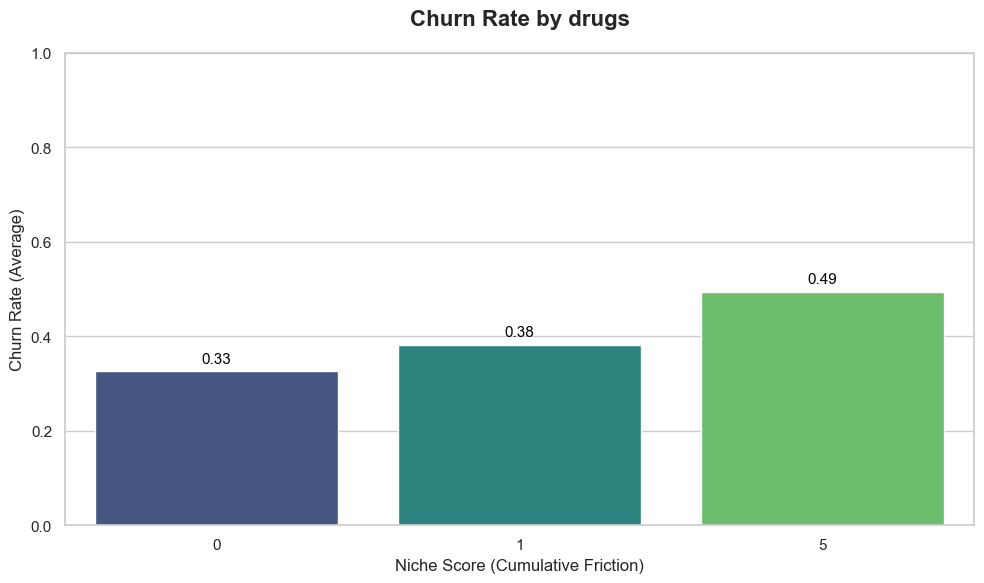

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 설정 (한글 폰트 설정이 필요할 수 있습니다)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. 바플롯 생성
# niche_score별로 이탈 여부(0 또는 1)의 평균을 내면 곧 이탈률이 됩니다.
ax = sns.barplot(
    data=df, 
    x='drugs', 
    y='is_churned', 
    palette='viridis',
    capsize=.1,
    errorbar=None  # 깔끔한 시각화를 위해 오차막대 제거 (필요시 'sd'로 변경)
)

# 3. 그래프 디테일 추가
plt.title('Churn Rate by drugs', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Niche Score (Cumulative Friction)', fontsize=12)
plt.ylabel('Churn Rate (Average)', fontsize=12)
plt.ylim(0, 1)  # 이탈률이므로 0~1 범위 고정

# 4. 바 상단에 수치 표시 (Annotate)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\kwonm\AppData\Local\Temp\ipykernel_11604\2783100116.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


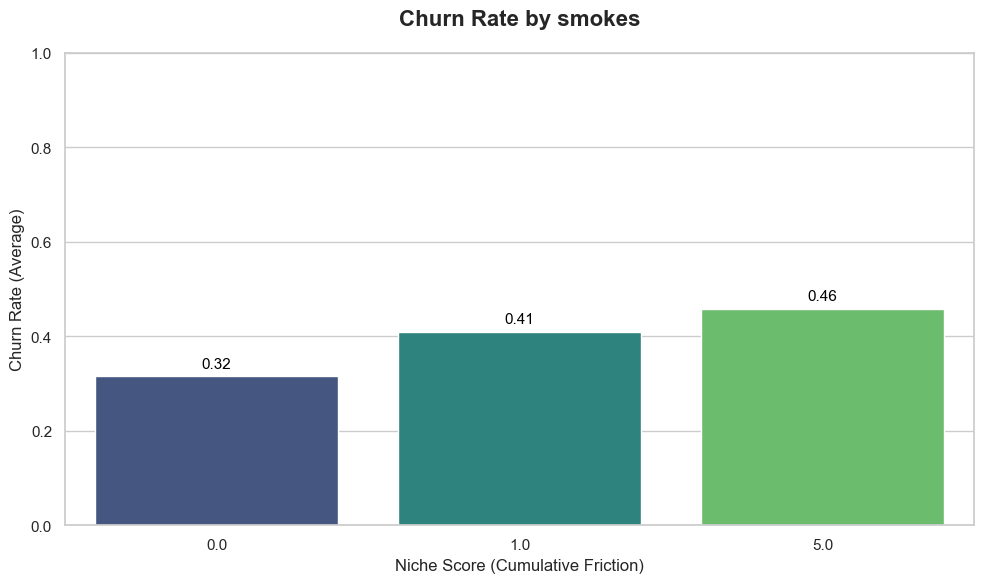

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 설정 (한글 폰트 설정이 필요할 수 있습니다)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. 바플롯 생성
# niche_score별로 이탈 여부(0 또는 1)의 평균을 내면 곧 이탈률이 됩니다.
ax = sns.barplot(
    data=df, 
    x='smokes', 
    y='is_churned', 
    palette='viridis',
    capsize=.1,
    errorbar=None  # 깔끔한 시각화를 위해 오차막대 제거 (필요시 'sd'로 변경)
)

# 3. 그래프 디테일 추가
plt.title('Churn Rate by smokes', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Niche Score (Cumulative Friction)', fontsize=12)
plt.ylabel('Churn Rate (Average)', fontsize=12)
plt.ylim(0, 1)  # 이탈률이므로 0~1 범위 고정

# 4. 바 상단에 수치 표시 (Annotate)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\kwonm\AppData\Local\Temp\ipykernel_11604\3299224738.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


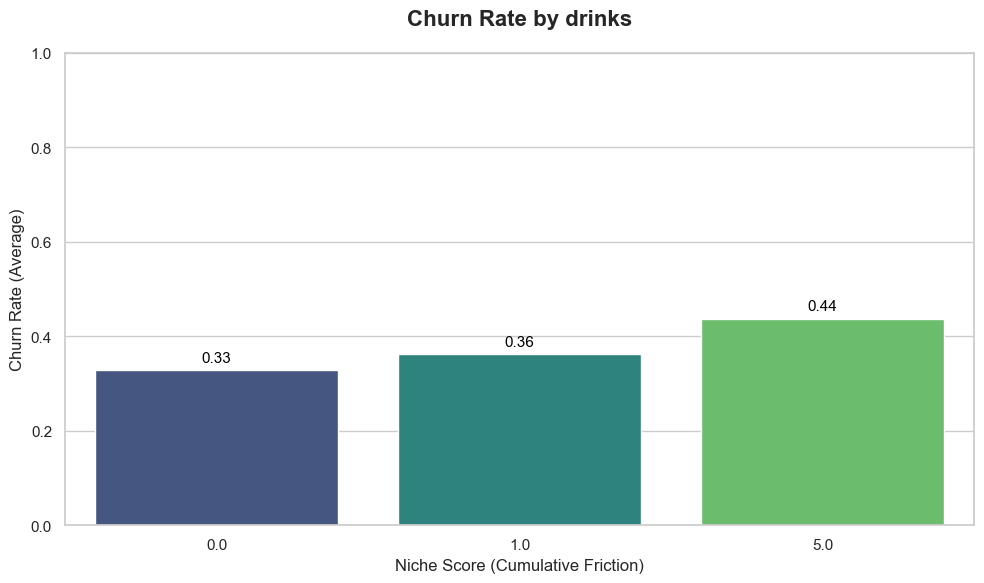

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 설정 (한글 폰트 설정이 필요할 수 있습니다)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. 바플롯 생성
# niche_score별로 이탈 여부(0 또는 1)의 평균을 내면 곧 이탈률이 됩니다.
ax = sns.barplot(
    data=df, 
    x='drinks', 
    y='is_churned', 
    palette='viridis',
    capsize=.1,
    errorbar=None  # 깔끔한 시각화를 위해 오차막대 제거 (필요시 'sd'로 변경)
)

# 3. 그래프 디테일 추가
plt.title('Churn Rate by drinks', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Niche Score (Cumulative Friction)', fontsize=12)
plt.ylabel('Churn Rate (Average)', fontsize=12)
plt.ylim(0, 1)  # 이탈률이므로 0~1 범위 고정

# 4. 바 상단에 수치 표시 (Annotate)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\kwonm\AppData\Local\Temp\ipykernel_11604\2422165374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


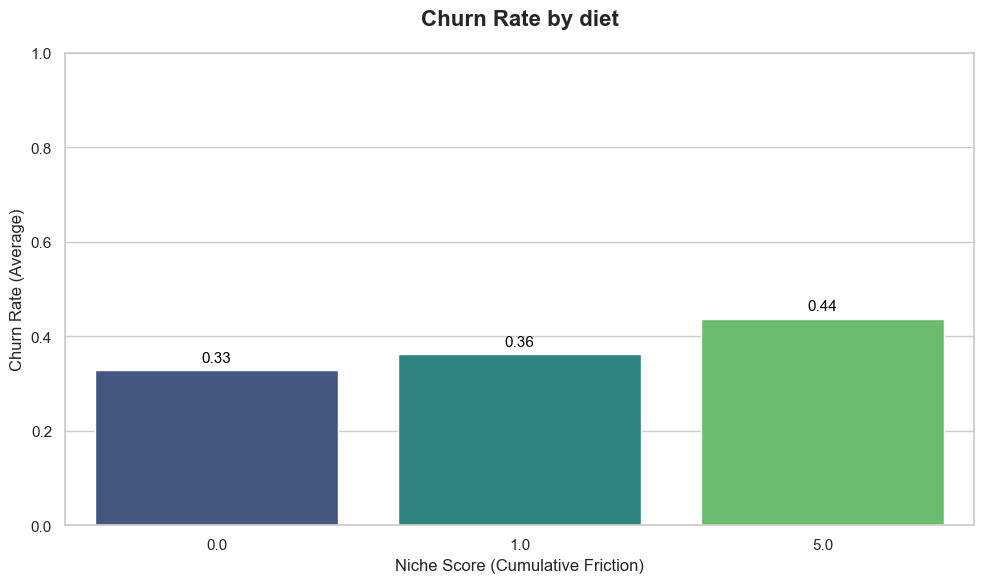

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 설정 (한글 폰트 설정이 필요할 수 있습니다)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. 바플롯 생성
# niche_score별로 이탈 여부(0 또는 1)의 평균을 내면 곧 이탈률이 됩니다.
ax = sns.barplot(
    data=df, 
    x='drinks', 
    y='is_churned', 
    palette='viridis',
    capsize=.1,
    errorbar=None  # 깔끔한 시각화를 위해 오차막대 제거 (필요시 'sd'로 변경)
)

# 3. 그래프 디테일 추가
plt.title('Churn Rate by diet', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Niche Score (Cumulative Friction)', fontsize=12)
plt.ylabel('Churn Rate (Average)', fontsize=12)
plt.ylim(0, 1)  # 이탈률이므로 0~1 범위 고정

# 4. 바 상단에 수치 표시 (Annotate)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\kwonm\AppData\Local\Temp\ipykernel_11604\3182064428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


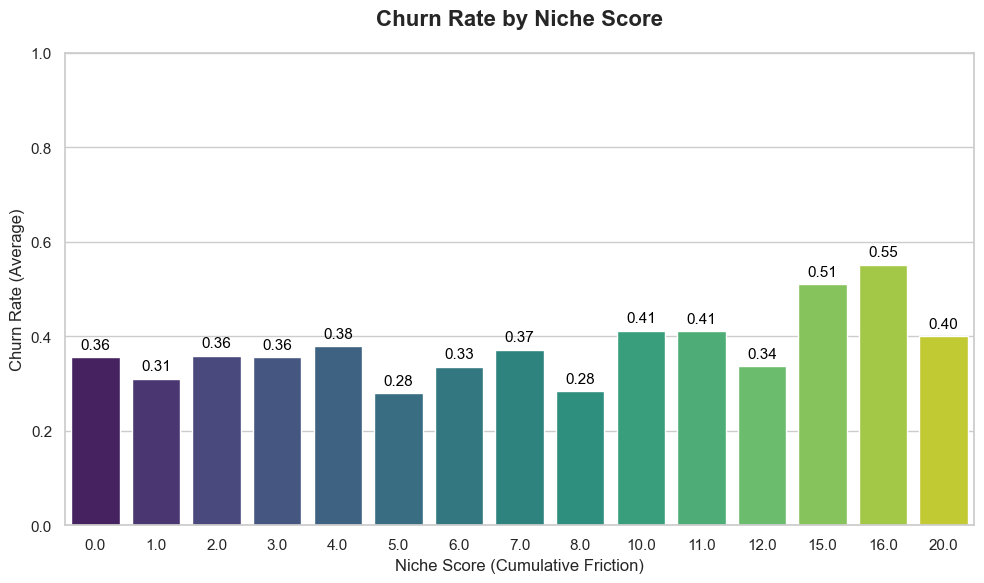

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 설정 (한글 폰트 설정이 필요할 수 있습니다)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. 바플롯 생성
# niche_score별로 이탈 여부(0 또는 1)의 평균을 내면 곧 이탈률이 됩니다.
ax = sns.barplot(
    data=df, 
    x='niche_score', 
    y='is_churned', 
    palette='viridis',
    capsize=.1,
    errorbar=None  # 깔끔한 시각화를 위해 오차막대 제거 (필요시 'sd'로 변경)
)

# 3. 그래프 디테일 추가
plt.title('Churn Rate by Niche Score', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Niche Score (Cumulative Friction)', fontsize=12)
plt.ylabel('Churn Rate (Average)', fontsize=12)
plt.ylim(0, 1)  # 이탈률이므로 0~1 범위 고정

# 4. 바 상단에 수치 표시 (Annotate)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()